<a href="https://colab.research.google.com/github/davidviana/clusters/blob/main/Atividade_Swift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import math as Math
from tkinter import font
import seaborn as sns
import datetime

In [44]:
df = pd.read_csv('Swift_SALES.csv')
df_list = df[['id_cliente', 'id_pedido', 'item_id','preco','horario_pedido']]
df_list.head()

,id_cliente,id_pedido,item_id,preco,horario_pedido
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,1,124.99,2020-05-16 15:05:35
1,8912fc0c3bbf1e2fbf35819e21706718,c1d2b34febe9cd269e378117d6681172,1,112.99,2020-11-09 00:50:13
2,8912fc0c3bbf1e2fbf35819e21706718,c1d2b34febe9cd269e378117d6681172,2,112.99,2020-11-09 00:50:13
3,f0ac8e5a239118859b1734e1087cbb1f,b1a5d5365d330d10485e0203d54ab9e8,1,124.99,2020-05-07 20:11:26
4,6bc8d08963a135220ed6c6d098831f84,2e604b3614664aa66867856dba7e61b7,1,106.99,2021-02-03 19:45:40


In [48]:
df_compra = df[['id_cliente', 'horario_pedido']]
df_compra = df.groupby('id_cliente').horario_pedido.max().reset_index()
df_compra.columns = ['id_cliente', 'DataMax']

In [49]:
df_compra['DataMax'] = pd.to_datetime(df_compra['DataMax'])

In [50]:
df_compra['Recência'] = (datetime.datetime.today() - df_compra['DataMax']).dt.days
df_compra.head()

,id_cliente,DataMax,Recência
0,004df18653e9438571e9d294776a5c5c,2021-06-04 15:54:53,514
1,0058ebe2dc136d918dd001968cfa5903,2020-02-09 16:19:02,995
2,006d7cf1f4f5fb1c805d2d7cacc8049d,2021-06-19 08:26:08,499
3,0099a73bb9e6010fad1106f3dbadfc1d,2020-04-17 11:34:34,927
4,009c9d2be03f80df9ef29fade7f998f3,2021-04-14 17:17:10,565


In [51]:
df_cliente = pd.merge(df_list, df_compra[['id_cliente', 'Recência']], on = 'id_cliente')
df_cliente.head()

,id_cliente,id_pedido,item_id,preco,horario_pedido,Recência
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,1,124.99,2020-05-16 15:05:35,898
1,8912fc0c3bbf1e2fbf35819e21706718,c1d2b34febe9cd269e378117d6681172,1,112.99,2020-11-09 00:50:13,721
2,8912fc0c3bbf1e2fbf35819e21706718,c1d2b34febe9cd269e378117d6681172,2,112.99,2020-11-09 00:50:13,721
3,f0ac8e5a239118859b1734e1087cbb1f,b1a5d5365d330d10485e0203d54ab9e8,1,124.99,2020-05-07 20:11:26,907
4,6bc8d08963a135220ed6c6d098831f84,2e604b3614664aa66867856dba7e61b7,1,106.99,2021-02-03 19:45:40,635


In [65]:
# metodo do cotovelo
x = df_cliente[['Recência']]

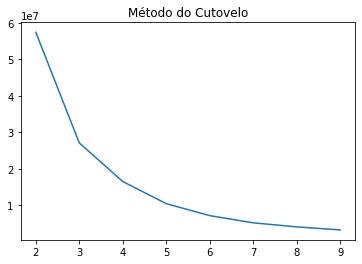

In [69]:
wcss = []
for n in range(2, 10):
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=len(x), random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 10), wcss)
plt.title('Método do Cutovelo')
plt.show()

In [67]:
# distance

def optimal_clusters(wcss, cluster_final):
  x1, y1 = 2, wcss[0]
  x2, y2 = cluster_final, wcss[-1]

  distances = []
  for i in range(len(wcss)):
      x0 = i + 2
      y0 = wcss[i]
      numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
      denominator = Math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
      res = (numerator/denominator)
      distances.append(res)
    
  optimal_cluster = distances.index(max(distances)) + 2
  return optimal_cluster

In [68]:
optimal_clusters(wcss, 9)

4